# Cleaning US Census Data

We just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.
Our boss wants us to make some scatterplots and histograms by the end of the day. Can we get this data into pandas and into reasonable shape so that we can make these histograms?

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
# With glob, we can take all of the files with the same naming structure and combine them:
files = glob.glob("states*.csv")
 
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)
df = pd.concat(df_list)   

df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [6]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB
None


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [8]:
# Converting Income Column to numeric
df.Income = pd.to_numeric(df.Income.str.replace('\$','',regex=True))
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.6+ KB
None


In [35]:
gender_split = df.GenderPop.str.split('_')
df['Men'] = gender_split.str.get(0)
df['Women'] = gender_split.str.get(1)
# replace ‘M’ & ‘F’
df['Men'] = df.Men.str[:-1]
df['Women'] = df.Women.str[:-1]
# to number conversion
df['Men'] = pd.to_numeric(df.Men)
df['Women'] = pd.to_numeric(df.Women)

df = df.fillna(value={
'Women': df.TotalPop - df.Men
})
df = df.fillna(value={
'Men': df.TotalPop - df.Women
})

In [36]:
duplicates = df.duplicated(subset=['State'])
print(duplicates.value_counts())
df = df.drop_duplicates()

False    51
True      9
dtype: int64


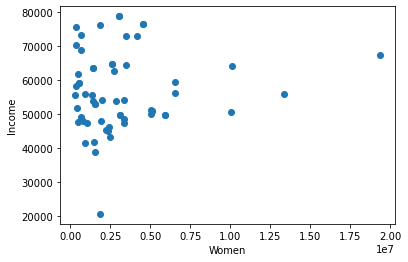

In [39]:
# Now We should have the columns we need to make the graph and make sure our boss does not slam a ruler angrily 
# on our desk because we’ve wasted our whole day cleaning your data with no results to show!
plt.scatter(df['Women'], df['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()


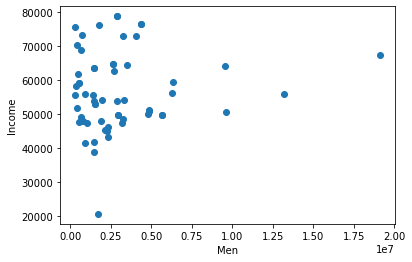

In [40]:

plt.scatter(df['Men'], df['Income'])
plt.xlabel('Men')
plt.ylabel('Income')
plt.show()

In [50]:
# Converting all other column into numeric for plotting
df['Hispanic'] = df['Hispanic'].str[:-1]
df['Hispanic'] = pd.to_numeric(df['Hispanic'])
df['White'] = df['White'].str[:-1]
df['White'] = pd.to_numeric(df['White'])
df['Black'] = df['Black'].str[:-1]
df['Black'] = pd.to_numeric(df['Black'])
df['Native'] = df['Native'].str[:-1]
df['Native'] = pd.to_numeric(df['Native'])
df['Asian'] = df['Asian'].str[:-1]
df['Asian'] = pd.to_numeric(df['Asian'])
df['Pacific'] = df['Pacific'].str[:-1]
df['Pacific'] = pd.to_numeric(df['Pacific'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     float64
 4   White       60 non-null     float64
 5   Black       60 non-null     float64
 6   Native      60 non-null     float64
 7   Asian       60 non-null     float64
 8   Pacific     55 non-null     float64
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       60 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 6.6+ KB
None


In [51]:
# Filling All the missing values

df = df.fillna(value={
'Hispanic': df.Hispanic.mean(),
'White': df.White.mean(),
'Black': df.Black.mean(),
'Native': df.Native.mean(),
'Asian': df.Asian.mean(),
'Pacific': df.Pacific.mean(),
})

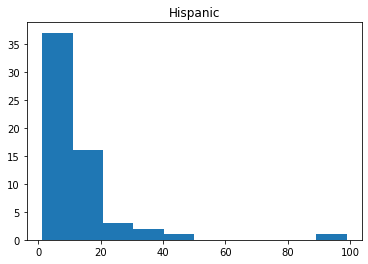

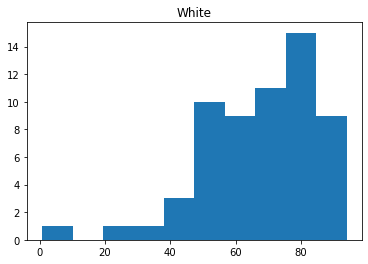

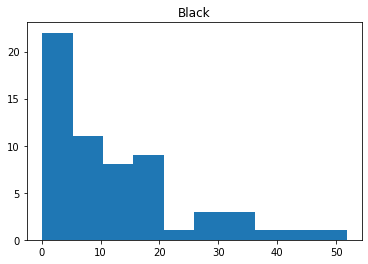

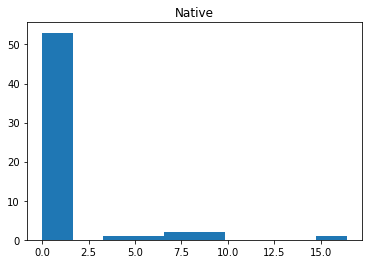

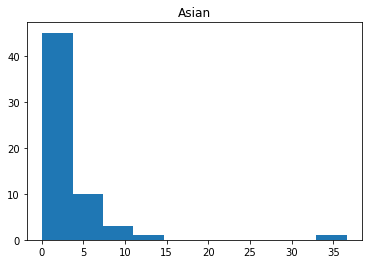

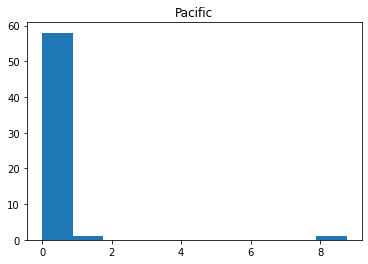

In [54]:
plt.hist(df['Hispanic'])
plt.title('Hispanic')
plt.show()
plt.cla()
plt.hist(df['White'])
plt.title('White')
plt.show()
plt.cla()
plt.hist(df['Black'])
plt.title('Black')
plt.show()
plt.cla()
plt.hist(df['Native'])
plt.title('Native')
plt.show()
plt.cla()
plt.hist(df['Asian'])
plt.title('Asian')
plt.show()
plt.cla()
plt.hist(df['Pacific'])
plt.title('Pacific')
plt.show()
